In [68]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [69]:
boston = load_boston()
# boston

In [70]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
cross_val_score(regressor, boston.data, boston.target, cv = 10,
               scoring = "neg_mean_squared_error")

array([-11.22504076,  -5.3945749 ,  -4.74755867, -22.54699078,
       -12.31243335, -17.18030718,  -6.94019868, -94.14567212,
       -28.541145  , -14.6250416 ])

In [71]:
# sklearn 当中的模型评估指标（打分）列表
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

## 用随机森林填充缺失值
- sklearn.impute.Simplelmputer

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.impute import  SimpleImputer # 填补缺失值的类
from sklearn.ensemble import RandomForestRegressor

In [73]:
dataset = load_boston()

dataset.data.shape

(506, 13)

In [74]:
dataset.target  # 不是标签数据，是回归

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [132]:
X_full, y_full = dataset.data, dataset.target

n_samples = X_full.shape[0]
n_features = X_full.shape[1]

In [133]:
# 为完整的数据集放入缺失值 -- 主要为了模拟确实情况

# 首先，确定我们希望放入的缺失值数据的比例，在这里我们假设是50%，那总共就要右3289个数据缺失
rng = np.random.RandomState(0)
missing_rate = 0.5
n_missing_samples = int(np.floor(n_samples * n_features * missing_rate))
# np.floor 向下取整，返回。0格式的浮点数
n_missing_samples

3289

In [134]:
# 所有数据要随机遍布在数据集的各行各列当中，而一个缺失值的数据会需要一个行索引和一个列索引
# 如果能够创造一个数组，包含3289个分布在0-506中间的行索引，和3289分布在0-13之间的列索引，那我们就需要利用列索引
# 来为数据中的任意3289个位置赋空值
# 然后我们用0，均值和随机森林来填写这些缺失值，然后查看回归的结果如何

missing_features = rng.randint(0, n_features, n_missing_samples)
missing_samples = rng.randint(0, n_samples, n_missing_samples)

# missing_samples = rng.choice(dataset.data.shape[0], n_missing_samples, replace = True)
# 这里我们不采用这种抽样
# 因为我们现在采样了3289个数据，远远超过我们的样本量506，所以我们使用随机抽样的函数randint。
# 但如果我们需要的数据量小于我们的样本量506，那我们可以采用np.random.choice 来抽样，choice会随机选取不重复的随机数
# 因此可以邦族我们让数据更加分散，确保数据不会集中在一些行中

In [135]:
len(missing_features)

3289

In [136]:
X_missing = X_full.copy()
y_missing = y_full.copy()

In [137]:
X_missing[missing_samples, missing_features] = np.nan

X_missing

array([[       nan, 1.8000e+01,        nan, ...,        nan,        nan,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00,        nan, ...,        nan, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02,        nan, 7.0700e+00, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan, 1.1930e+01, ..., 2.1000e+01,        nan,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ...,        nan, 3.9690e+02,
        7.8800e+00]])

In [138]:
X_missing = pd.DataFrame(X_missing)

X_missing

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,NaN,NaN,0.538,NaN,65.2,4.0900,1.0,296.0,NaN,NaN,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,2.0,NaN,NaN,396.90,9.14
2,0.02729,NaN,7.07,0.0,NaN,7.185,61.1,NaN,2.0,242.0,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,0.458,NaN,45.8,NaN,NaN,222.0,18.7,NaN,NaN
4,NaN,0.0,2.18,0.0,NaN,7.147,NaN,NaN,NaN,NaN,18.7,NaN,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,NaN,NaN,0.0,0.573,NaN,69.1,NaN,1.0,NaN,21.0,NaN,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,NaN,396.90,9.08
503,NaN,NaN,11.93,NaN,0.573,6.976,91.0,NaN,NaN,NaN,21.0,NaN,5.64
504,0.10959,0.0,11.93,NaN,0.573,NaN,89.3,NaN,1.0,NaN,21.0,393.45,6.48


In [139]:
# y_missing 不能填空值，因为是结果

## 填充缺失值

In [140]:
# 1. 使用均值填充缺失值

from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_missing_mean = imp_mean.fit_transform(X_missing)
X_missing_mean

# 确认是否右空值的方法
# pd.DataFrame(X_missing_mean).isnull().sum()

array([[3.62757895e+00, 1.80000000e+01, 1.11634641e+01, ...,
        1.85211921e+01, 3.52741952e+02, 4.98000000e+00],
       [2.73100000e-02, 0.00000000e+00, 1.11634641e+01, ...,
        1.85211921e+01, 3.96900000e+02, 9.14000000e+00],
       [2.72900000e-02, 1.07229508e+01, 7.07000000e+00, ...,
        1.85211921e+01, 3.52741952e+02, 1.29917666e+01],
       ...,
       [3.62757895e+00, 1.07229508e+01, 1.19300000e+01, ...,
        2.10000000e+01, 3.52741952e+02, 5.64000000e+00],
       [1.09590000e-01, 0.00000000e+00, 1.19300000e+01, ...,
        2.10000000e+01, 3.93450000e+02, 6.48000000e+00],
       [4.74100000e-02, 0.00000000e+00, 1.19300000e+01, ...,
        1.85211921e+01, 3.96900000e+02, 7.88000000e+00]])

In [141]:
# 2. 使用0进行缺失值填充
imp_0 = SimpleImputer(missing_values = np.nan, strategy='constant', fill_value = 0)
X_missing_0 = imp_0.fit_transform(X_missing)
X_missing_0

array([[0.0000e+00, 1.8000e+01, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [0.0000e+00, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 0.0000e+00,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 0.0000e+00, 3.9690e+02,
        7.8800e+00]])

In [142]:
# 3. 使用随机森林进行填充
X_missing_reg = X_missing.copy()
X_missing_reg

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,NaN,NaN,0.538,NaN,65.2,4.0900,1.0,296.0,NaN,NaN,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,2.0,NaN,NaN,396.90,9.14
2,0.02729,NaN,7.07,0.0,NaN,7.185,61.1,NaN,2.0,242.0,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,0.458,NaN,45.8,NaN,NaN,222.0,18.7,NaN,NaN
4,NaN,0.0,2.18,0.0,NaN,7.147,NaN,NaN,NaN,NaN,18.7,NaN,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,NaN,NaN,0.0,0.573,NaN,69.1,NaN,1.0,NaN,21.0,NaN,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,NaN,396.90,9.08
503,NaN,NaN,11.93,NaN,0.573,6.976,91.0,NaN,NaN,NaN,21.0,NaN,5.64
504,0.10959,0.0,11.93,NaN,0.573,NaN,89.3,NaN,1.0,NaN,21.0,393.45,6.48


In [143]:
# 找出数据集中，缺失值从小到大排列的特征们的顺序,并且有了这些特征的索引
# argsort会返回从小到大的排序顺序所对应的索引。相比于sort方法，不丢失索引
sortindex = np.argsort(X_missing_reg.isnull().sum(axis = 0)).values
sortindex

array([ 6, 12,  8,  7,  9,  0,  2,  1,  5,  4,  3, 10, 11], dtype=int64)

In [144]:
X_missing_reg.isnull().sum(axis=0)

0     200
1     201
2     200
3     203
4     202
5     201
6     185
7     197
8     196
9     197
10    204
11    214
12    189
dtype: int64

In [145]:
for i in sortindex:
    
    # 构建我们的新特征矩阵和新标签
    df = X_missing_reg
    fillc = df.iloc[:, i]
    df = pd.concat([df.iloc[:, df.columns != i], pd.DataFrame(y_full)], axis=1)
    
    # 在新特征矩阵中，对含有缺失值的列，进行0的补充 - 暂时没有被选中去补充的特征，那么用0填充
    df_0 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0).fit_transform(df)
    
    # 找出我们的训练集和测试集
    # Ytrain 是被选中的特征中（现在是我们的标签），存在的那些值，非空值
    Ytrain = fillc[fillc.notnull()]
    # Ytest 是被选中的要填充的特征中，不存在的那些值，是空值
    Ytest = fillc[fillc.isnull()]
    # 在新特征上，被选出来的要填充的特征的非空值所对应的索引
    Xtrain = df_0[Ytrain.index, :]
    # 我们需要的不是Ytest的值，而是其所带的索引
    Xtest = df_0[Ytest.index, :]
    
    # 用随机森林回归来填补缺失值
    rfc = RandomForestRegressor(n_estimators=100)
    rfc = rfc.fit(Xtrain, Ytrain)
    Ypredict = rfc.predict(Xtest) # 用predict接口将Xtest导入，得到我们的预测结果（回归结果），就是我们用来填补空值的这些值
    
    # 将填充好的特征返回到我们的原始的特征矩阵中
    X_missing_reg.loc[X_missing_reg.iloc[:, i].isnull(), i] = Ypredict

In [146]:
X_missing_reg

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.322129,18.00,6.8138,0.10,0.538000,6.66363,65.200,4.090000,1.00,296.00,18.321,389.2948,4.9800
1,0.027310,0.00,5.2398,0.00,0.469000,6.14584,78.900,4.967100,2.00,292.99,18.706,396.9000,9.1400
2,0.027290,13.47,7.0700,0.00,0.469628,7.18500,61.100,4.273956,2.00,242.00,18.078,387.2171,4.6665
3,0.075586,24.81,2.8395,0.00,0.458000,6.81765,45.800,4.757156,3.80,222.00,18.700,394.1916,5.9346
4,0.052964,0.00,2.1800,0.00,0.466077,7.14700,56.776,5.059883,3.65,244.94,18.700,394.0884,5.3300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.498906,2.38,11.3609,0.00,0.573000,6.23607,69.100,3.041075,1.00,274.59,21.000,391.3982,9.6700
502,0.045270,0.00,11.9300,0.00,0.573000,6.12000,76.700,2.287500,1.00,273.00,18.732,396.9000,9.0800
503,0.736580,0.18,11.9300,0.29,0.573000,6.97600,91.000,2.348181,4.98,365.45,21.000,379.2472,5.6400
504,0.109590,0.00,11.9300,0.03,0.573000,6.34360,89.300,2.647802,1.00,241.39,21.000,393.4500,6.4800


In [147]:
# 发现没列都没有缺失值了
X_missing_reg.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

## 接下来对比各种填充值的训练情况

In [150]:
X = [X_full, X_missing_mean, X_missing_0, X_missing_reg]

mse = []

for x in X:
    estimator = RandomForestRegressor(random_state=0, n_estimators = 100)
    scores = cross_val_score(estimator, x, y_full, scoring = 'neg_mean_squared_error', cv = 5).mean()
    mse.append(scores * -1)

In [151]:
mse # 我们追求的是mse越小越好

[21.571667100368845,
 40.848037216676374,
 49.626793201980185,
 19.369678848223636]

In [152]:
[*zip(["X_full", "X_missing_mean", "X_missing_0", "X_missing_reg"], mse)]

[('X_full', 21.571667100368845),
 ('X_missing_mean', 40.848037216676374),
 ('X_missing_0', 49.626793201980185),
 ('X_missing_reg', 19.369678848223636)]

## 将所得出的结果画图

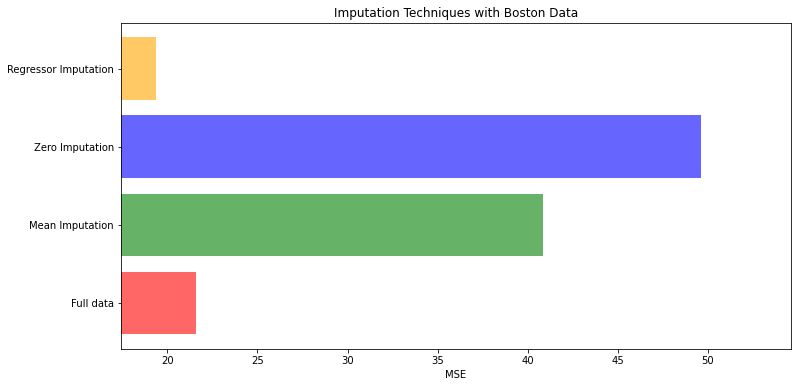

In [155]:
x_labels = ['Full data','Mean Imputation','Zero Imputation','Regressor Imputation']

colors  = ['r','g','b','orange']

plt.figure(figsize=(12, 6))
ax = plt.subplot(111)

for i in np.arange(len(mse)):
    ax.barh(i, mse[i], color = colors[i], alpha = 0.6, align = 'center') # 条形图是bar，这里后面加h,成为barh,表示水平画图
    
ax.set_title('Imputation Techniques with Boston Data')
ax.set_xlim(left = np.min(mse) * 0.9,
           right = np.max(mse) * 1.1) # X轴的区间，最左边的取到0.9倍的数据开始，最右边取到1.1倍的地方

ax.set_yticks(np.arange(len(mse))) # y轴的刻度
ax.set_xlabel('MSE') # X轴的名字
# ax.invert_yaxis() # 把y上面个的轴，帮我命名好 -- 删掉图也不变，所以删除【好像图形顺序变了，应该是按照列表中的数据】
ax.set_yticklabels(x_labels) # 用参数列表中的数据，做为Y的命名

plt.show()

In [ ]:
# 用随机森林填充的数据吴超最小
# 用0值填充的，误差最大